#### BOW,TFIDF,Machine Learning Algorithms

1. Preprocessing And Cleaning
2. Train Test Split
3. BOW And TF-IDF (Sentences--->vectors) {Preventing Data Leakage}
4. Trained Our Models


In [ ]:
import pandas as pd
messages=pd.read_csv('SMSSpamCollection',
                    sep='\t',names=["label","message"])

In [2]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
## Data Cleaning And Preprocessing
import re
import nltk

In [4]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [5]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [6]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

## Create Bag Of Words

In [9]:
## Output Features
y=pd.get_dummies(messages['label'])#The pd.get_dummies() function converts categorical data in messages['label'] into a one-hot encoded DataFrame.
y=y.iloc[:,0].values#This selects the first column from the one-hot encoded DataFrame.(.values)Converts the selected column (a Pandas Series) into a NumPy array for easier numerical computations.

In [10]:
y

array([ True,  True, False, ...,  True,  True,  True])

In [11]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.30)


In [12]:
## Create the Bag OF Words model
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=2500,ngram_range=(1,2))

In [13]:
len(X_train),len(y_train),len(X_test),len(y_test)

(3900, 3900, 1672, 1672)

In [14]:
## independent features
X_train=cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [15]:

X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
cv.vocabulary_

{'said': 1794,
 'mind': 1309,
 'go': 798,
 'bedroom': 152,
 'minut': 1312,
 'ok': 1483,
 'sed': 1822,
 'sexi': 1861,
 'mood': 1353,
 'came': 269,
 'latr': 1111,
 'wid': 2390,
 'cake': 229,
 'wife': 2393,
 'said mind': 1796,
 'mind go': 1310,
 'go bedroom': 800,
 'bedroom minut': 153,
 'minut ok': 1315,
 'ok sed': 1490,
 'sed sexi': 1823,
 'sexi mood': 1862,
 'mood came': 1354,
 'came minut': 270,
 'minut latr': 1313,
 'latr wid': 1112,
 'wid cake': 2391,
 'cake wife': 230,
 'pop': 1622,
 'lt': 1225,
 'gt': 859,
 'help': 924,
 'lt gt': 1227,
 'respons': 1748,
 'one': 1497,
 'power': 1628,
 'place': 1589,
 'other': 1523,
 'heart': 914,
 'alway': 51,
 'give': 793,
 'care': 288,
 'gud': 873,
 'night': 1438,
 'swt': 2045,
 'dream': 563,
 'take': 2050,
 'swt dream': 2046,
 'take care': 2051,
 'seem': 1834,
 'like': 1151,
 'weird': 2375,
 'time': 2129,
 'want': 2335,
 'come': 376,
 'smoke': 1923,
 'day': 484,
 'make': 1251,
 'everyon': 638,
 'want come': 2336,
 'free': 719,
 'messag': 1298,
 

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
treemodel = DecisionTreeClassifier(max_depth=2, random_state=42)
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [18]:
treemodel

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'x[203] <= 0.5\ngini = 0.225\nsamples = 3900\nvalue = [503.0, 3397.0]'),
 Text(0.25, 0.5, 'x[2228] <= 0.5\ngini = 0.137\nsamples = 3476\nvalue = [258, 3218]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.091\nsamples = 3367\nvalue = [161, 3206]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.196\nsamples = 109\nvalue = [97, 12]'),
 Text(0.75, 0.5, 'x[320] <= 0.5\ngini = 0.488\nsamples = 424\nvalue = [245, 179]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 361\nvalue = [182.0, 179.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 63\nvalue = [63, 0]')]

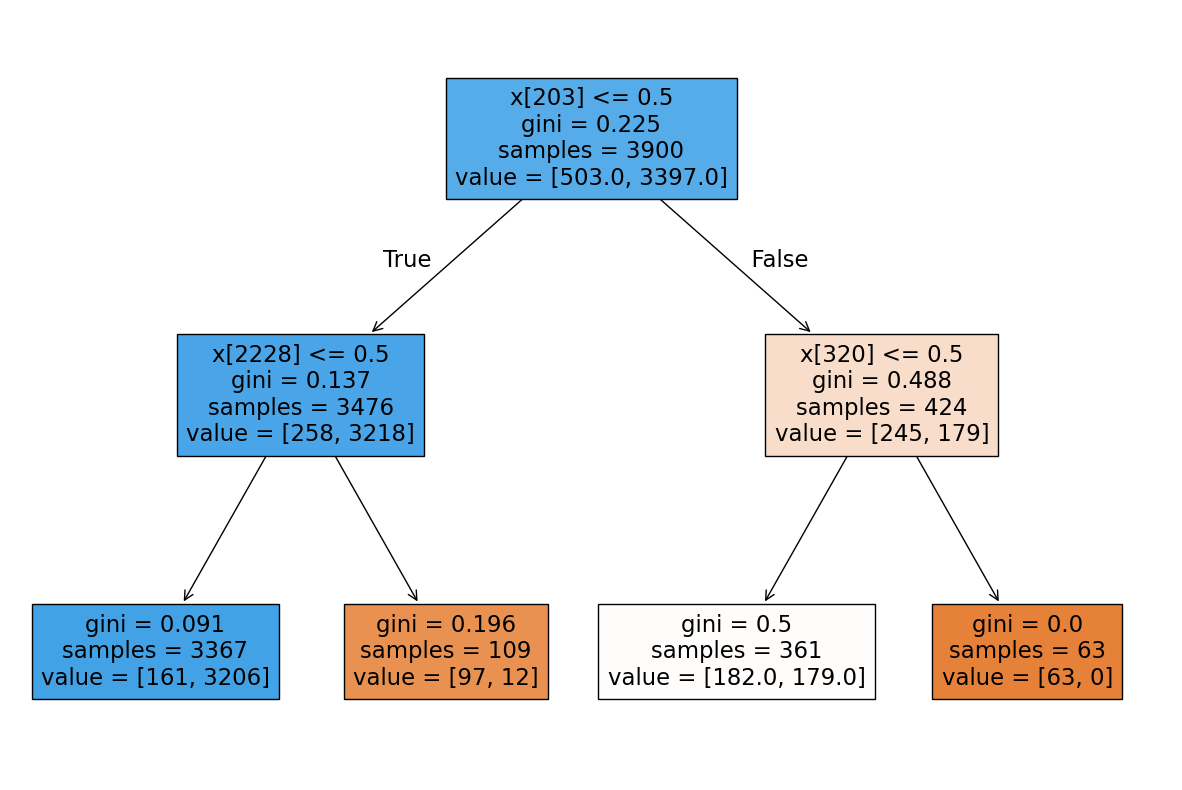

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [22]:
y_pred=treemodel.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,classification_report

In [24]:
accuracy_score(y_test,y_pred)

0.8857655502392344

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.61      0.59      0.60       244
        True       0.93      0.94      0.93      1428

    accuracy                           0.89      1672
   macro avg       0.77      0.76      0.77      1672
weighted avg       0.88      0.89      0.89      1672



### Creating The TF-IDF Model

In [66]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.20)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=2500,ngram_range=(1,2))
X_train=tv.fit_transform(X_train).toarray()
X_test=tv.transform(X_test).toarray()

In [68]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
tv.vocabulary_

{'everybodi': 638,
 'fun': 758,
 'even': 630,
 'miss': 1318,
 'realli': 1702,
 'hope': 957,
 'work': 2430,
 'doesnt': 551,
 'get': 782,
 'stress': 2012,
 'gr': 857,
 'day': 488,
 'gr day': 858,
 'usual': 2284,
 'iam': 990,
 'fine': 694,
 'happi': 900,
 'amp': 57,
 'well': 2379,
 'haha': 888,
 'oh': 1480,
 'lesson': 1146,
 'tmr': 2137,
 'world': 2433,
 'realiz': 1701,
 'year': 2484,
 'old': 1493,
 'ladi': 1095,
 'run': 1782,
 'around': 89,
 'think': 2103,
 'wast': 2343,
 'yup': 2499,
 'noe': 1438,
 'leh': 1141,
 'still': 1989,
 'havent': 909,
 'got': 848,
 'urself': 2278,
 'ah': 34,
 'ok': 1484,
 'cool': 423,
 'see': 1822,
 'ya': 2469,
 'see ya': 1828,
 'sometim': 1936,
 'put': 1664,
 'wall': 2326,
 'heart': 914,
 'safe': 1789,
 'hurt': 987,
 'find': 689,
 'care': 290,
 'enough': 615,
 'break': 204,
 'closer': 357,
 'ring': 1759,
 'thing': 2102,
 'whole': 2394,
 'hous': 971,
 'scream': 1811,
 'hair': 890,
 'love': 1206,
 'hot': 967,
 'live': 1175,
 'fantasi': 665,
 'call': 237,
 'per': 

In [70]:
from sklearn.naive_bayes import MultinomialNB
spam_tfidf_model = MultinomialNB().fit(X_train, y_train)

In [71]:

#prediction
y_pred=spam_tfidf_model.predict(X_test)

In [72]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9802690582959641


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.85      0.99      0.92       120
        True       1.00      0.98      0.99       995

    accuracy                           0.98      1115
   macro avg       0.92      0.99      0.95      1115
weighted avg       0.98      0.98      0.98      1115

